- codificar.py: programa que oculta mensagem de texto na imagem.
- decodificar.py: programa que recupera mensagem de texto da imagem.
- imagem_entrada.png: imagem no formato PNG em que sera embutida a mensagem. ´
- imagem_saida.png: imagem no formato PNG com mensagem embutida.
- texto_entrada.txt: arquivo-texto contendo mensagem a ser oculta.
- texto_saida.txt: arquivo-texto contendo mensagem recuperada.
- plano_bits: trˆes planos de bits menos significativos representados pelos valores 0, 1 ou 2.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

## Read Image

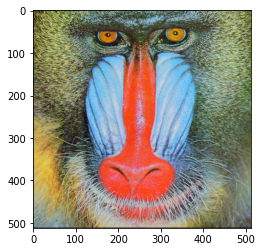

In [3]:
img = cv2.imread("baboon.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

## Convert image to binary

In [4]:
type(img)

numpy.ndarray

In [5]:
#Get binary representation
bin_nums = ((img.reshape(-1,1) & (2**np.arange(8))) != 0).astype(int)

In [6]:
#Reshape to image
img_bin = bin_nums.reshape(img.shape[0], img.shape[1], img.shape[2], 8)

## Get the text to stenograph

### Text to binary

In [7]:
def toBinary(a):
    l,m=[],[]
    for i in a:
        l.append(ord(i))
    for i in l:
        m.append(int(bin(i)[2:]))
    return m

In [8]:
#Code to find the inittial and final of message
secrect_code = toBinary("@NAM@")
secrect_code

[1000000, 1001110, 1000001, 1001101, 1000000]

In [9]:
#A scratch message to test
scratch_msg = toBinary("teste")
scratch_msg

[1110100, 1100101, 1110011, 1110100, 1100101]

### Get the less bit column

In [10]:
#less significant bit
less_bits = bin_nums[:,:1]

In [11]:
less_bits

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

### Set the mensagem bits

In [12]:
test_to_write = secrect_code + scratch_msg + secrect_code

In [13]:
len(test_to_write)*8

120

In [14]:
#transforma o test_to_write em uma uma sting e dps pega o tamanho dela, da um slice de 0:tamanho e coloca o valor do test_to_write

### Insert message into bits

In [15]:
bin_msg = ""
for char in test_to_write:
    bin_msg+=str(char)

In [16]:
msg_size = len(bin_msg)

In [17]:
bin_msg_int = np.array([int(char) for char in bin_msg])

### Split the locale to inset message

In [18]:
less_bits.T[0][:msg_size] = bin_msg_int

In [19]:
bin_nums[:,:1] = less_bits

In [20]:
bin_nums

array([[1, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [21]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        y += j<<i
    return y

In [22]:
test = [bool2int(x[::]) for x in bin_nums]

In [23]:
img_test = np.array(test).reshape(512,512,3)

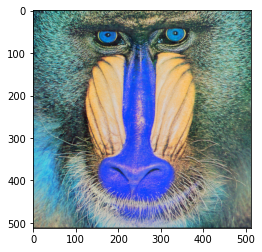

In [24]:
plt.imshow(img_test)
plt.savefig('baboon_text.png', bbox_inches='tight', pad_inches=0)
plt.show()

## Exctract mensagem from image

Escreve a mensagem inteira nos bits, inves de pegar a coluna inteira usar [:3] de cada linha para escrever, e conforme nao vai dando o espaço ele troca de linha.

In [26]:
import collections

In [27]:
collections.Counter(np.array(img == img_test).reshape(512*512*3))

Counter({True: 786370, False: 62})

In [28]:
img_test

array([[[ 71, 150, 164],
        [ 30,  56,  62],
        [ 10,  43,  74],
        ...,
        [ 68, 119, 117],
        [101, 170, 141],
        [118, 188, 179]],

       [[ 62, 125, 120],
        [ 33,  97, 135],
        [ 23,  35,  55],
        ...,
        [ 98, 140, 122],
        [128, 159, 136],
        [ 74, 138, 120]],

       [[ 31,  74,  99],
        [ 46, 118, 132],
        [ 36,  41,  60],
        ...,
        [ 90,  93, 118],
        [ 77,  91,  87],
        [ 49,  80,  96]],

       ...,

       [[155, 148, 121],
        [150, 156, 123],
        [139, 150, 124],
        ...,
        [ 60,  73, 110],
        [ 70,  93,  90],
        [ 60,  80,  81]],

       [[168, 169, 126],
        [151, 151, 117],
        [133, 136, 121],
        ...,
        [ 68,  84,  73],
        [ 86,  69,  99],
        [ 71,  63,  80]],

       [[ 12,  11,   9],
        [ 11,  12,  10],
        [ 12,  15,  11],
        ...,
        [  5,   8,   5],
        [  0,   5,   2],
        [  2,   5,   4]]

In [29]:
# Nao precisa converter usando como array so olhar os ultimos numeros do binario

In [30]:
bin_nums[0]

array([1, 1, 1, 0, 0, 0, 1, 0])

In [31]:
bin_nums

array([[1, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [32]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

## Tests

In [34]:
img.shape

(512, 512, 3)

In [38]:
format(img[0][0][0], '08b')

'01000111'

In [ ]:
import cv2 
import numpy as np 
import random 

def encrypt():
    
    img1 = cv2.imread('pic1.jpg') 
    img2 = cv2.imread('pic2.jpg') 
      
    for i in range(img2.shape[0]): 
        for j in range(img2.shape[1]): 
            for l in range(3): 
                v1 = format(img1[i][j][l], '08b') 
                v2 = format(img2[i][j][l], '08b') 
                v3 = v1[:4] + v2[:4]  
                img1[i][j][l]= int(v3, 2) 
                  
    cv2.imwrite('pic3in2.png', img1) 
  
      
def decrypt():
    
    img = cv2.imread('pic3in2.png')  
    width = img.shape[0] 
    height = img.shape[1] 
      
    
    img1 = np.zeros((width, height, 3), np.uint8) 
    img2 = np.zeros((width, height, 3), np.uint8) 
      
    for i in range(width): 
        for j in range(height): 
            for l in range(3): 
                v1 = format(img[i][j][l], '08b') 
                v2 = v1[:4] + chr(random.randint(0, 1)+48) * 4
                v3 = v1[4:] + chr(random.randint(0, 1)+48) * 4
                              img1[i][j][l]= int(v2, 2) 
                img2[i][j][l]= int(v3, 2) 
      
    
    
    cv2.imwrite('pic2_re.png', img1) 
    cv2.imwrite('pic3_re.png', img2) 
      

encrypt() 
decrypt() 